# Introduction

### Imports

In [1]:
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#1.-Interpretation-and-significance" data-toc-modified-id="1.-Interpretation-and-significance-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>1. Interpretation and significance</a></span></li><li><span><a href="#2.-Weather-model" data-toc-modified-id="2.-Weather-model-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>2. Weather model</a></span></li><li><span><a href="#3.-House-prices-model" data-toc-modified-id="3.-House-prices-model-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>3. House prices model</a></span></li></ul></li></ul></li></ul></div>

### 1. Interpretation and significance

Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

*expenditure* is the annual spending on recreation in US dollars, *annual_income* is the annual income in US dollars, and *have_kids* is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

1. The first annual income coefficient means that for every dollar of income, expenditure increases .0012. For example, an annual income of 10,000 = $12 expenditure. For the second coefficient, the annual income is squared and then times by the coefficient of .00002. Since the correlation between expenditure and annual income is quadratic, the magnitude increases as annual income increases. Lastly, the "have kids" variable is a binary categorical feature (0: no kids, 1: has kids). If the family has kids then 223.57 is minus from the rest of the equation and zero if they don't.


2. T-test with corresponding p-value: This will give insight on which independent variable makes a significant difference on outcome variable. If the p-value is less than .05 then that specific variable does make a significant difference on the outcome variable.


### 2. Weather model

In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables? 
* Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for *humidity* and *windspeed* change? Interpret the estimated coefficients.

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
weather_df['wind_and_humidity'] = weather_df.windspeed * weather_df.humidity
weather_df['target_temp'] = weather_df.apparenttemperature - weather_df.temperature

model = LinearRegression()

X = weather_df[['humidity', 'windspeed']]

Y = weather_df['target_temp']

model.fit(X, Y)

X = sm.add_constant(X)

pred = sm.OLS(Y, X).fit()

pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            target_temp   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Mon, 15 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:57:42   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The humidity and windspeed variables are statistically significant in terms of predicting the difference between the apparent and actual temperature. This is also the case when only predicting temperature. 

The coefficients can be interpreted as:

$$-3.0292\_humidiity +  -0.1193\_windspeed $$

The coefficients for both variables are negative. As humidity and windspeed increase, the difference between apparent temperature and temperature increases. 

In [4]:
weather_df['wind_and_humidity'] = weather_df.windspeed * weather_df.humidity
weather_df['target_temp'] = weather_df.apparenttemperature - weather_df.temperature

model = LinearRegression()

X = weather_df[['humidity', 'windspeed', 'wind_and_humidity']]

Y = weather_df['target_temp']

model.fit(X, Y)

X = sm.add_constant(X)

pred = sm.OLS(Y, X).fit()

pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            target_temp   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Mon, 15 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:57:42   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0839      0.033      2.511      0.012       0.018       0.149
humidity              0.1775      0.043      4.133      0.000       0.093       0.262
windspeed             0.0905      0.002     36.797      0.000       0.086       0.095
wind_and_humidity    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding the interaction term changed the humidity and windspeed coefficients positively. All explanatory variables are statistically significant in relation to the target variable. As the humidity and windspeed go up the target outcome goes up. Although since the interaction term's coefficient is stronger than the windspeed and humidity coefficient combined, the difference between apparent and actual temeperature still increases.

Windspeed increase and humidity constant = greater temperature difference compared to humidity increases and windspeed constant. 

This because humidity has a stronger larger positive coefficient compared to windspeed. 

###  3. House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
* Now, exclude the insignificant features from your model. Did anything change?
* Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
* Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
housing_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()


In [6]:
#features with .5 correlation or more with sales price and aren't correlated with each other
feature_list = ['overallqual', 'yearbuilt', 'yearremodadd', 'totalbsmtsf', 'grlivarea', 'fullbath', 'garagearea']

model = LinearRegression()

X = housing_df[feature_list]
Y = housing_df['saleprice']

model.fit(X,Y)

X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     696.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:57:45   Log-Likelihood:                -17470.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1452   BIC:                         3.500e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.214e+06   1.28e+05     -9.498      0.000   -1.46e+06   -9.63e+05
overallqual   1.976e+04   1178.281     16.767      0.000    1.74e+04    2.21e+04
yearbuilt      283.6291     49.800      5.695      0.000     185.942     381.317
yearremodadd   297.5604     63.988      4.650      0.000     172.042     423.079
totalbsmtsf     27.8779      2.879      9.684      0.000      22.231      33.525
grlivarea       54.0144      3.007     17.964      0.000      48.116      59.913
fullbath     -5452.9867   2656.907     -2.052      0.040   -1.07e+04    -241.201
garagearea      45.5563      6.144      7.414      0.000      33.503      57.609
==============================================================================
Omnibus:                      545.241   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75131.350
Skew:                          -0.653   Prob(JB):                         0.00
Kurtosis:                      38.119   Cond. No.                     4.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

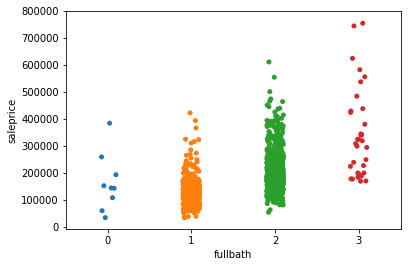

In [7]:
sns.stripplot('fullbath', 'saleprice', data= housing_df, jitter=True)

Looking at the p-value for all independent variables, all variables are statistically significant in terms of sales price. In addition, all of their respective coefficients are significantly greater than zero. The variables that contribute the most to sale price are: overallqual, fullbath and year built. It makes sense why the overall quality and year built of the house is an important factor to sales price but the negative significant of the full bath variable doesn't. You would assume that the more full baths there are in the house the higher the sales price would be. This issue could be the result in the data being bias towards houses with less fullbaths.